# Logistic Regression using gradient decent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# Load data
data = pd.read_csv('./insurance_data.csv')
X = data['age'].values.reshape(1, -1)     # shape: (1, m)
Y = data['bought_insurance'].values.reshape(1, -1)  # shape: (1, m)
X = X / 100.0

In [4]:
# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y.T, test_size=0.3, random_state=42)
X_train, X_test = X_train.T, X_test.T
Y_train, Y_test = Y_train.T, Y_test.T

In [5]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Forward propagation
def forward_prop(W, b, X):
    Z = np.dot(W, X) + b
    A = sigmoid(Z)
    return A, Z

# Compute cost (log loss)
def compute_cost(A, Y):
    m = Y.shape[1]
    cost = -1/m * np.sum(Y * np.log(A + 1e-15) + (1 - Y) * np.log(1 - A + 1e-15))
    return cost

# Backward propagation
def backward_prop(X, A, Y):
    m = X.shape[1]
    dZ = A - Y
    dW = 1/m * np.dot(dZ, X.T)
    db = 1/m * np.sum(dZ)
    return dW, db

In [6]:
# Training loop
def train(X, Y, iterations=10000, lr=0.1):
    W = np.random.randn(1, 1) * 0.01
    b = 0
    for i in range(iterations):
        A, Z = forward_prop(W, b, X)
        cost = compute_cost(A, Y)
        dW, db = backward_prop(X, A, Y)
        W = W - lr * dW
        b = b - lr * db

        if i % 1000 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    return W, b


In [7]:
# Prediction
def predict(X, W, b):
    A, _ = forward_prop(W, b, X)
    return (A > 0.5).astype(int)

# Accuracy
def accuracy(predictions, Y):
    return np.mean(predictions == Y) * 100


Iteration 0: Cost = 0.6940
Iteration 1000: Cost = 0.5307
Iteration 2000: Cost = 0.4672
Iteration 3000: Cost = 0.4372
Iteration 4000: Cost = 0.4213
Iteration 5000: Cost = 0.4123
Iteration 6000: Cost = 0.4069
Iteration 7000: Cost = 0.4034
Iteration 8000: Cost = 0.4011
Iteration 9000: Cost = 0.3996
Test Predictions: [[1 0 1 0 0 0 0 1 0]]
Test Accuracy: 88.89%


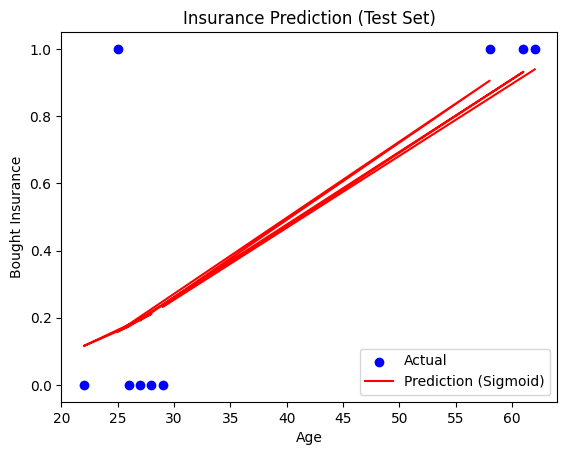

In [ ]:
# Train the model on training data
W, b = train(X_train, Y_train, iterations=100, lr=0.1)

# Evaluate on test data
test_preds = predict(X_test, W, b)
test_acc = accuracy(test_preds, Y_test)
print("Test Predictions:", test_preds)
print("Test Accuracy: {:.2f}%".format(test_acc))

# Plotting predictions vs actual for test set
plt.scatter(X_test.flatten() * 100, Y_test.flatten(), label='Actual', color='blue')
plt.plot(X_test.flatten() * 100, sigmoid(np.dot(W, X_test) + b).flatten(), label='Prediction (Sigmoid)', color='red')
plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.title('Insurance Prediction (Test Set)')
plt.legend()
plt.show()